In [2]:
import pandas as pd
df = pd.read_csv('bitstampUSD.csv')
df.shape  # 4.8 million rows
print("\nNumber of NA rows: {}".format(len(df.Weighted_Price[df.Weighted_Price.isna() == True])))


Number of NA rows: 1243608


In [3]:
print("\nNumber of NA rows: {}".format(len(df.Weighted_Price[df.Weighted_Price.isna() == True])))
df = df.dropna()  # 3.6 million rows left
# If I don't write "df = " then the value of df does not update
# It prints 0 before I even drop NA? does it execute all lines at the same time instead of in order?


Number of NA rows: 1243608


In [55]:
print("\nData length no NA: {}".format(len(df)))
print("\nData no NA:\n{}".format(df.head(5)))


Data length no NA: 3613769

Data no NA:
       Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0     1325317920  4.39  4.39  4.39   4.39      0.455581           2.000000   
478   1325346600  4.39  4.39  4.39   4.39     48.000000         210.720000   
547   1325350740  4.50  4.57  4.50   4.57     37.862297         171.380338   
548   1325350800  4.58  4.58  4.58   4.58      9.000000          41.220000   
1224  1325391360  4.58  4.58  4.58   4.58      1.502000           6.879160   

      Weighted_Price  High_Low_Diff  
0           4.390000           0.00  
478         4.390000           0.00  
547         4.526411           0.07  
548         4.580000           0.00  
1224        4.580000           0.00  


Text(0, 0.5, 'Price (USD)')

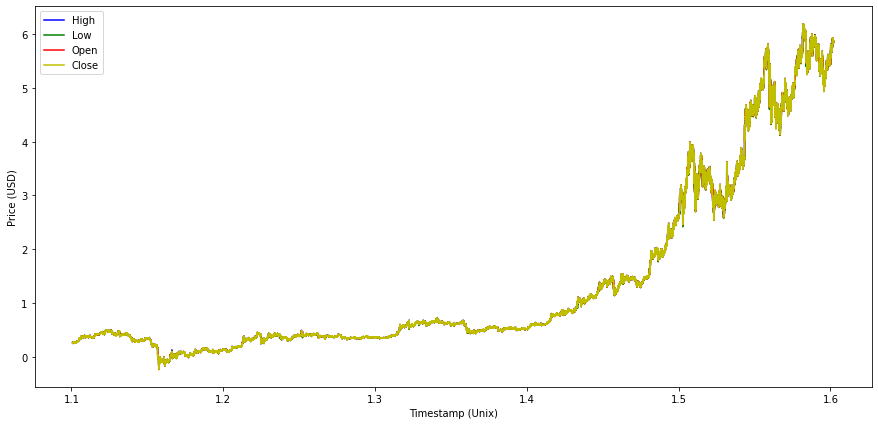

In [31]:
import matplotlib.pyplot as plt
# (1) Plot time vs high
# (2) Add open, close, low, volume
# (3) convert timestamp to date
# (4) Average price for each date

normalized_df=(df-df.mean())/df.std()


timestamp = normalized_df['Timestamp'].iloc[3000000:]
high_price = normalized_df['High'].iloc[3000000:]
low_price = normalized_df['Low'].iloc[3000000:]
open_price = normalized_df['Open'].iloc[3000000:]
close_price = normalized_df['Close'].iloc[3000000:]
volume = normalized_df['Volume_(BTC)'].iloc[3000000:]

plt.figure(figsize = (15,7))

plt.plot(timestamp, high_price, 'b-', label='High')
plt.plot(timestamp, low_price, 'g-', label='Low')
plt.plot(timestamp, open_price, 'r-', label='Open')
plt.plot(timestamp, close_price, 'y-', label='Close')
# plt.plot(timestamp, volume, 'c-', label='Volume')
plt.legend(loc='upper left')

plt.xlabel('Timestamp (Unix)')
plt.ylabel('Price (USD)')


Text(0, 0.5, 'Volume')

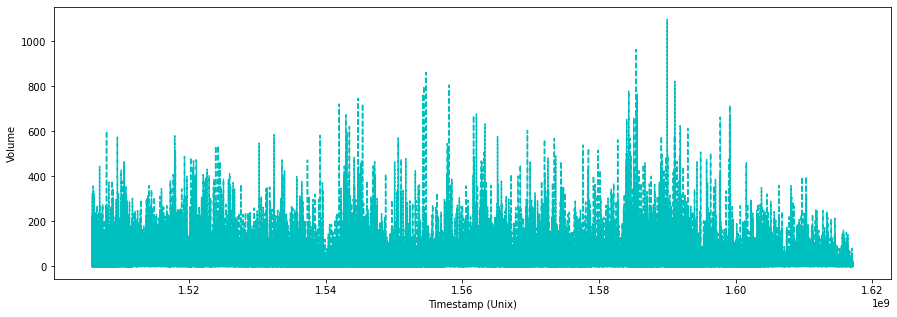

In [61]:
plt.figure(figsize = (15,5))

volume = df['Volume_(BTC)'].iloc[3000000:]
timestamp = df['Timestamp'].iloc[3000000:]

plt.plot(timestamp, volume, 'c--')
plt.xlabel('Timestamp (Unix)')
plt.ylabel('Volume (BTC)')

# Why does it look like a bar chart instead of line graph?

# for each interval, sum the volumes. keep as bar chart.

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

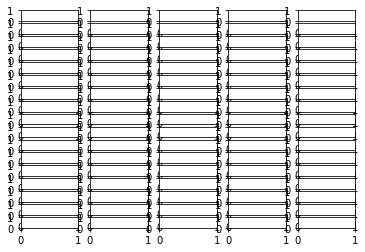

In [36]:
# df['High_Low_Diff'] = df['High'] - df['Low']
df['High_Low_Diff'] = df.apply(lambda row: row.High - row.Low, axis = 1)

price_range = df['High_Low_Diff'].iloc[3000000:]

fig, ax = plt.subplots(17,5)
ax.plot(timestamp, price_range)

ax.set(xlabel='Timestamp (Unix)', ylabel='Price Range (High - Low) (USD)',
       title='Difference between High Price and Low Price (Range) per Unix Timestamp')
ax.grid()
# Why does it look like a bar chart instead of line graph?

In [6]:
df = df.dropna()
print(df.shape)
price_max_high = df['High'].rolling(window=200).max()
price_max_high = price_max_high.dropna()
price_min_low = df['Low'].rolling(window=200).min()
print(price_max_high.shape)

#plt.plot(timestamp, price_max_high, 'b-', label='High')
#plt.plot(timestamp, price_min_low, 'g-', label='Low')


(3613769, 8)
(3613570,)


(1000000,)
5000


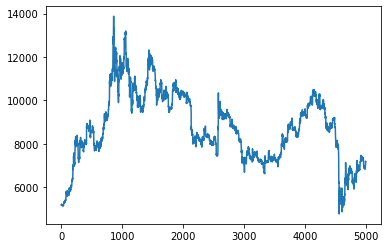

In [35]:
# for each interval, graph the highest high and highest low
# for each interval, graph open from first point and close from last
# for each interval, graph the sum of the volumes

# mean from 0-99 will be y for x1. mean from 100-199 will be y for x2. etc.

# data should be the last 1,000,000 points.
high = df['High'].iloc[2613769:]
timestamp = df['Timestamp'].iloc[2613769:]
print(high.shape) 
# 5,000 intervals of size 200
int_size = 200
num_intervals = int(high.size/int_size)
print(num_intervals)

max_high = [0] * 5000
time = [0] * 5000

for i in range(num_intervals):
    interval = high.iloc[i*100:(100*i)+99]
    max = 0
    for n in interval:
        if n > max:
            max = n
    max_high[i] = max
    time[i] = i
    #print(f'Interval {i+1}: {i*100} to {i*100+99}. MAX ON INTERVAL: {max}')        

plt.plot(time, max_high)


# price_highest_high = df['High'].rolling(window=100).max()